<a href="https://colab.research.google.com/github/ambika-1513/Task1/blob/main/Task_1_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('California_Housing.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
pd.get_dummies(df.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data = df.join(pd.get_dummies(df.ocean_proximity).astype(int))

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [ ]:
data.drop(columns = ['ocean_proximity'], inplace=True)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

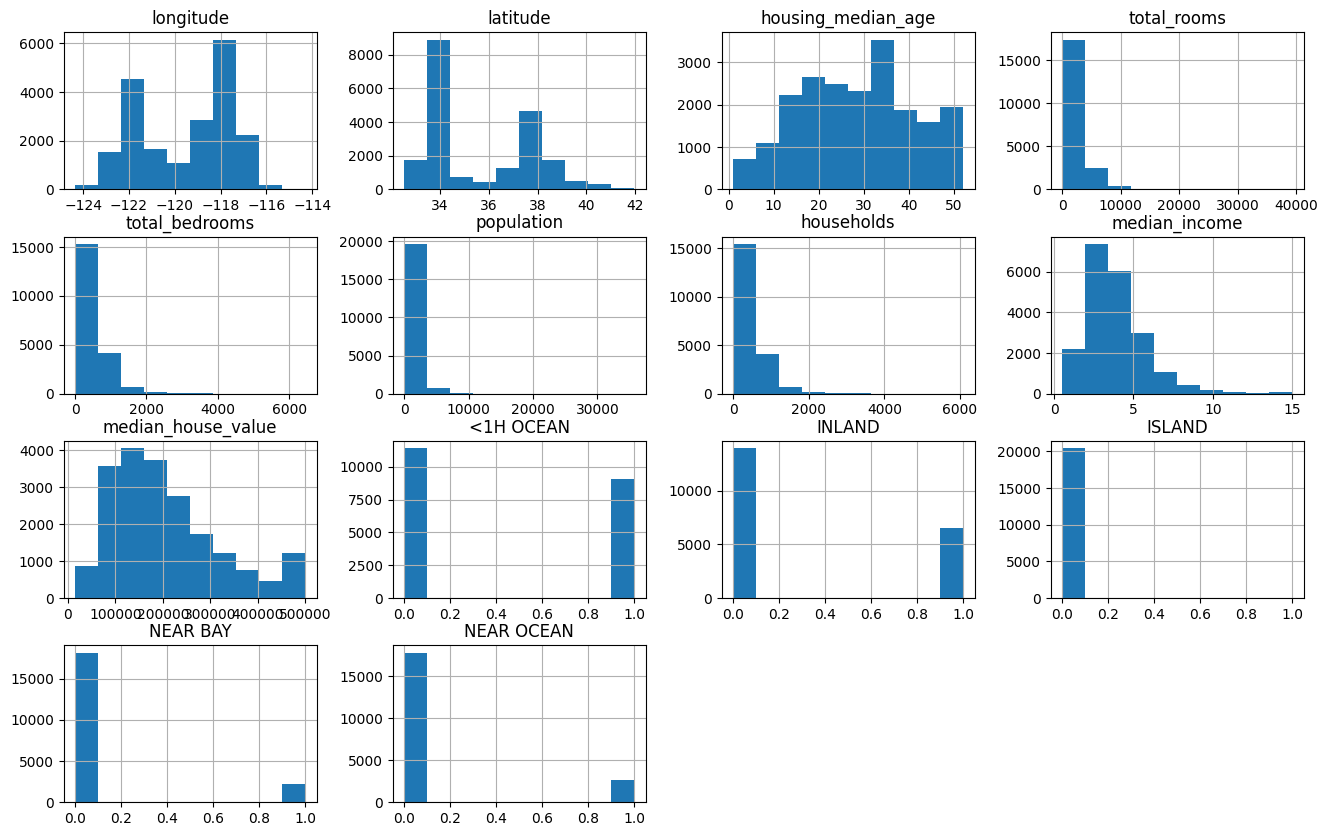

In [ ]:
data.hist(figsize=(16,10))

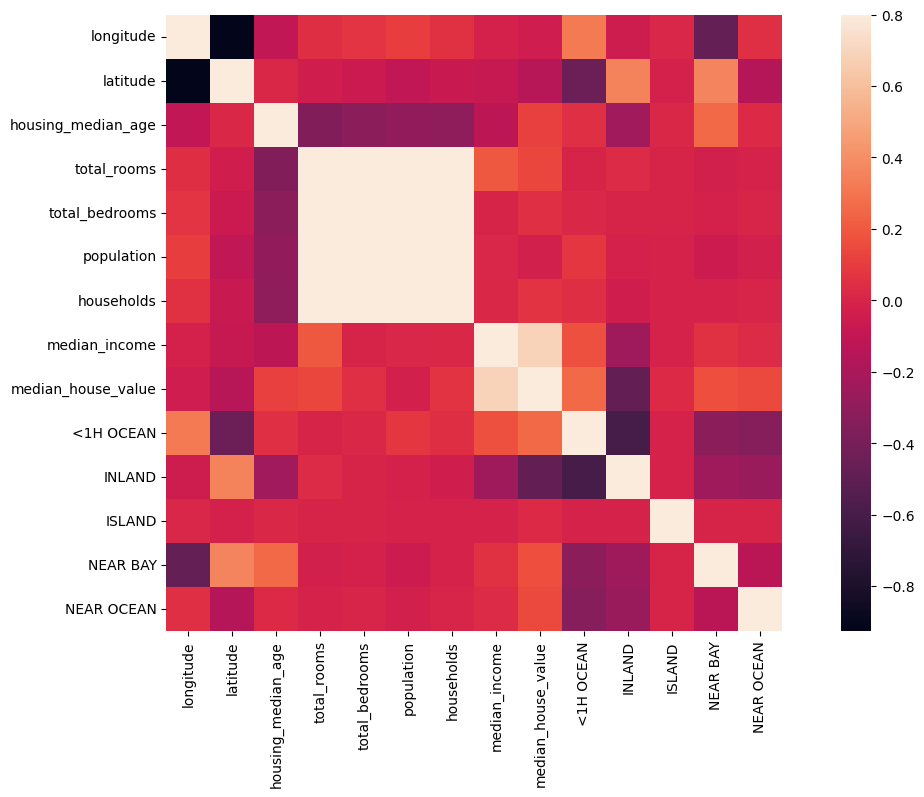

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), vmax=.8, square=True);

In [ ]:
data['total_rooms'] = np.log(data['total_rooms']  + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms']  + 1)
data['population'] = np.log(data['population']  + 1)
data['households'] = np.log(data['households']  + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

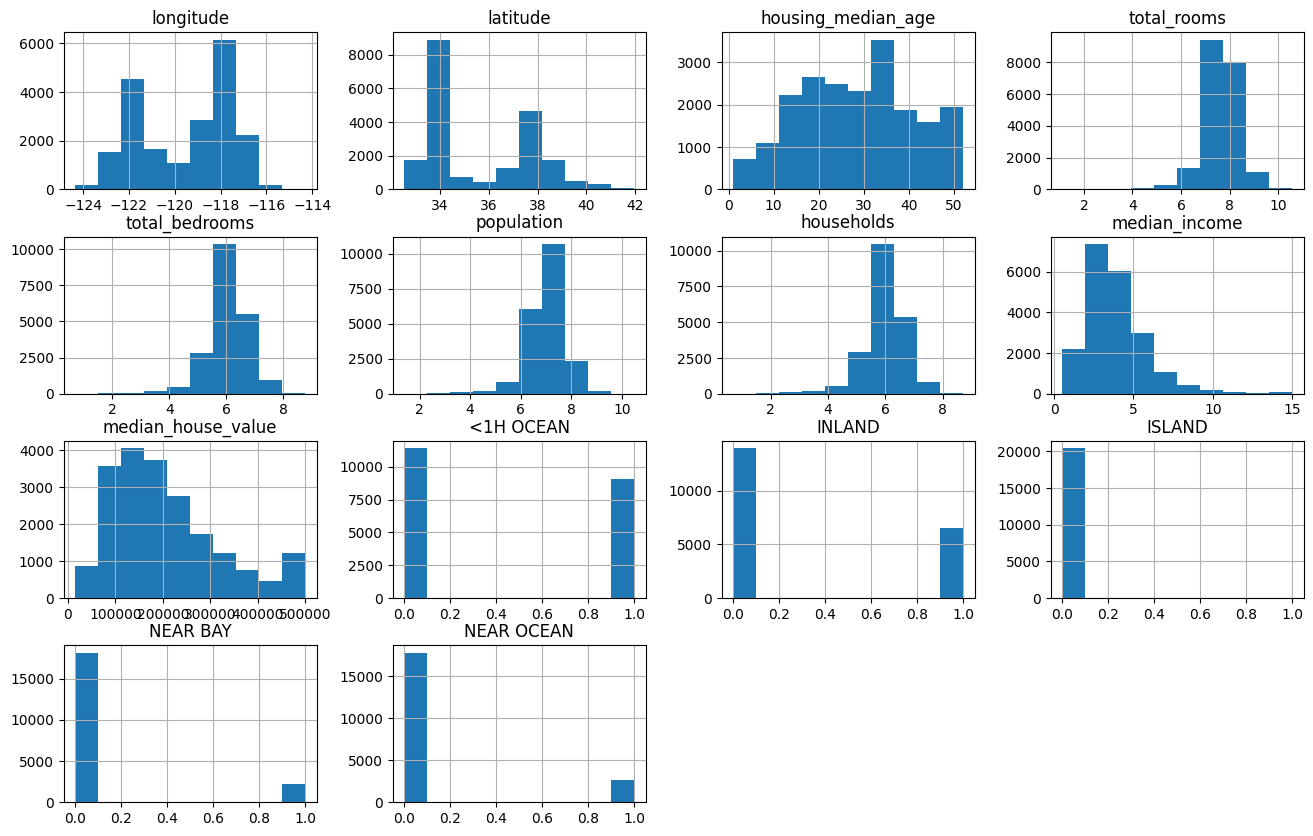

In [ ]:
data.hist(figsize = (16,10))

<Axes: xlabel='latitude', ylabel='longitude'>

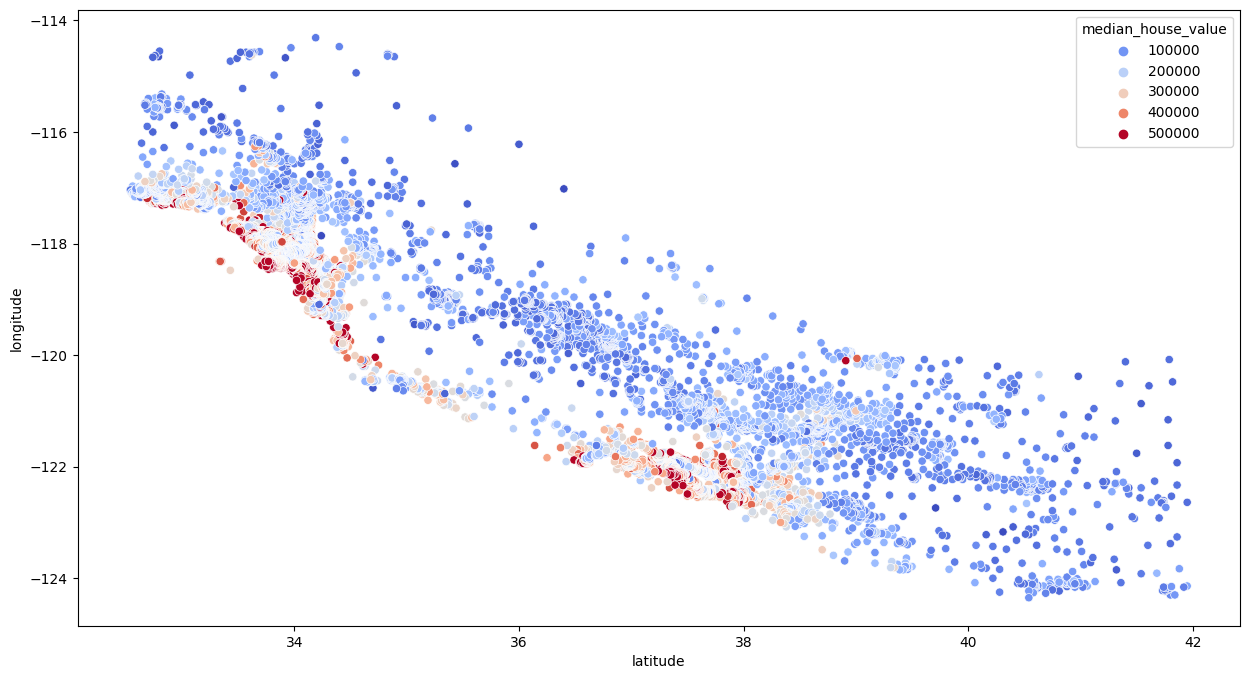

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue = 'median_house_value', palette = 'coolwarm')

In [ ]:
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

<Axes: >

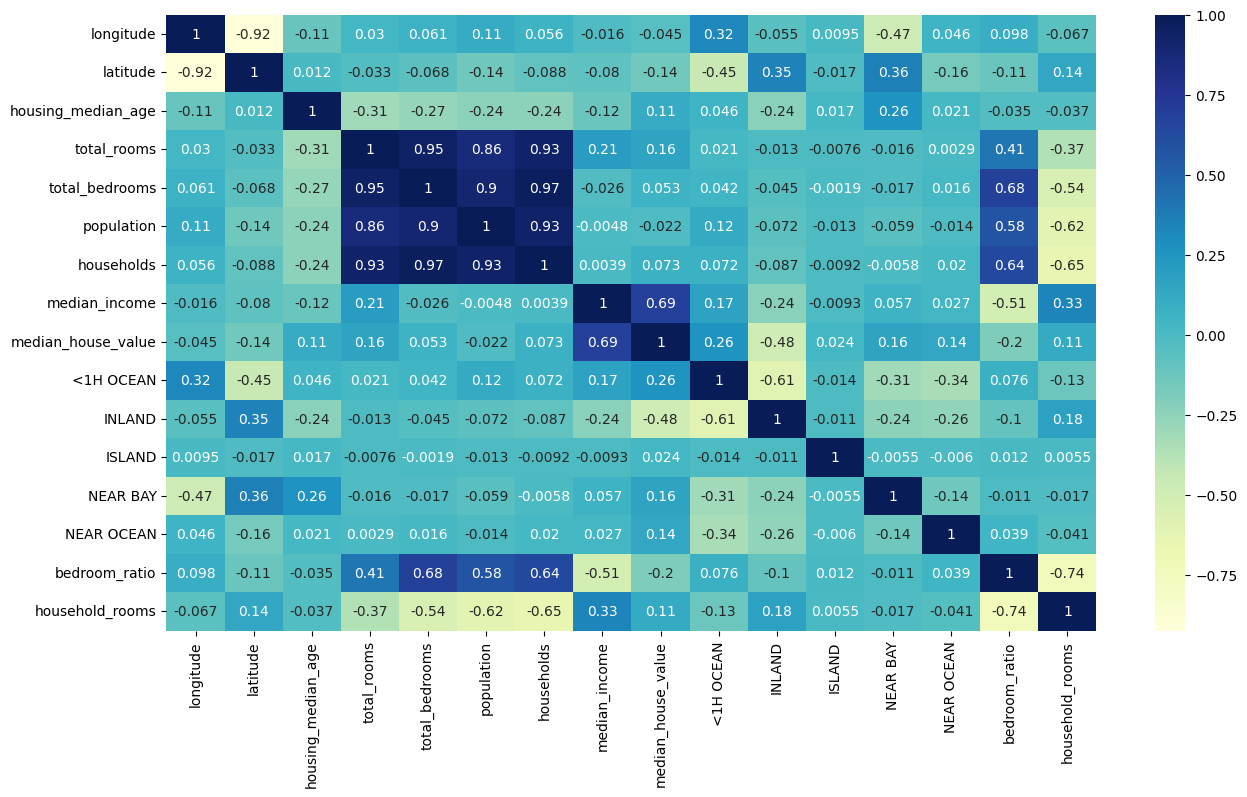

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap ="YlGnBu")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243


In [ ]:
from sklearn.model_selection import train_test_split
X= data.drop(['median_house_value'], axis =1)
Y = data['median_house_value']

x_train,x_test, y_train, y_test =  train_test_split(X,Y, test_size=0.2, random_state = 2302)

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0,0.799078,1.285243


In [ ]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
X[numerical_features] = StandardScaler().fit_transform(X[numerical_features])

In [ ]:
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
    tf.keras.layers.Dropout(0.6),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
205/205 [==============================] - 3s 8ms/step - loss: 32020502528.0000 - mae: 141219.4375 - val_loss: 13028480000.0000 - val_mae: 89802.4297
Epoch 2/20
205/205 [==============================] - 1s 5ms/step - loss: 13892853760.0000 - mae: 91764.6641 - val_loss: 12742590464.0000 - val_mae: 88521.4375
Epoch 3/20
205/205 [==============================] - 1s 4ms/step - loss: 13452822528.0000 - mae: 90352.5938 - val_loss: 12470086656.0000 - val_mae: 86951.8281
Epoch 4/20
205/205 [==============================] - 1s 5ms/step - loss: 13183610880.0000 - mae: 89385.1797 - val_loss: 12020890624.0000 - val_mae: 86170.1016
Epoch 5/20
205/205 [==============================] - 1s 5ms/step - loss: 12771268608.0000 - mae: 87882.1094 - val_loss: 11624054784.0000 - val_mae: 83626.9766
Epoch 6/20
205/205 [==============================] - 1s 5ms/step - loss: 12194212864.0000 - mae: 85985.8906 - val_loss: 10850910208.0000 - val_mae: 81639.3516
Epoch 7/20
205/205 [===================

In [ ]:
y_pred = model.predict(x_test)

128/128 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 51589.663778635004
Mean Squared Error: 5272210974.402004
Root Mean Squared Error: 72609.9922490149


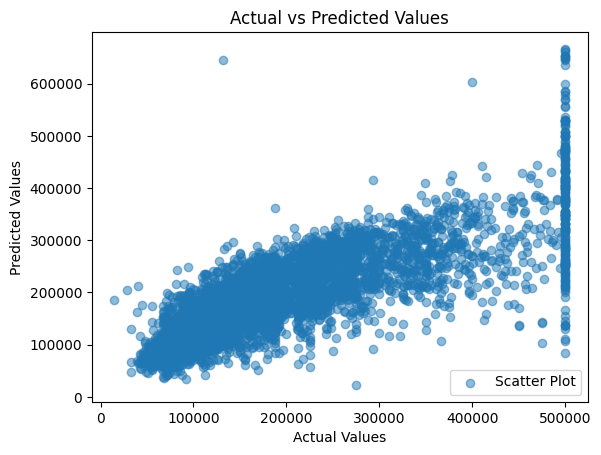

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5, label='Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()